In [1]:
# Bibliotecas para poder realizar análises estatísticas e visualizações de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Estadistica inferencial

La estadistica inferencial permite estimar propiedades de una poblacion a partir de una muestra aleatoria de una poblacion.

Continente: América
Altura media estimada: 170.48 cm
Intervalo de confianza del 95%: (169.07, 171.89) cm



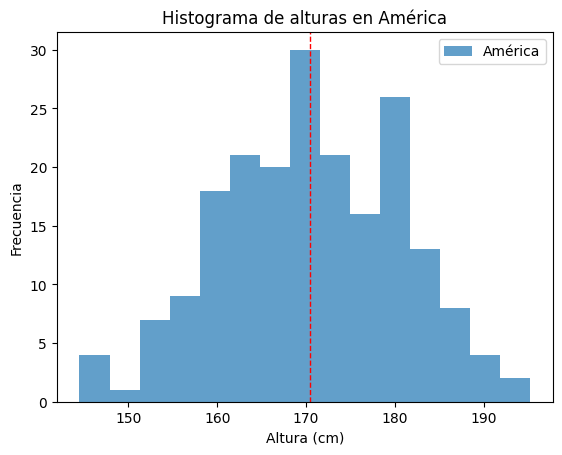

Continente: Europa
Altura media estimada: 170.71 cm
Intervalo de confianza del 95%: (169.28, 172.14) cm



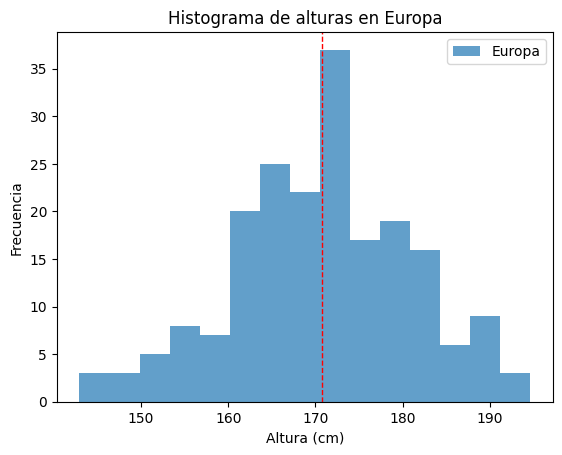

Continente: Asia
Altura media estimada: 169.70 cm
Intervalo de confianza del 95%: (168.31, 171.10) cm



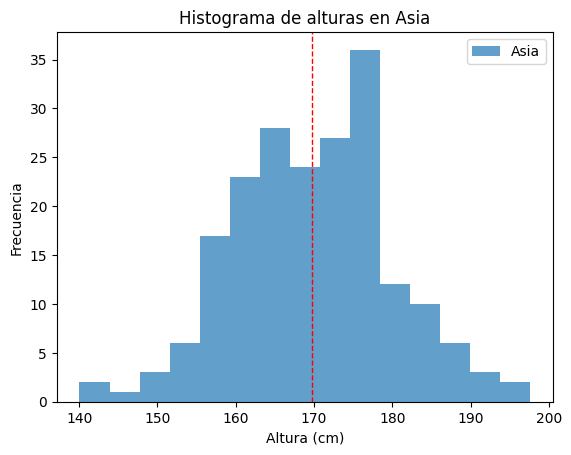

Continente: África
Altura media estimada: 169.72 cm
Intervalo de confianza del 95%: (168.24, 171.21) cm



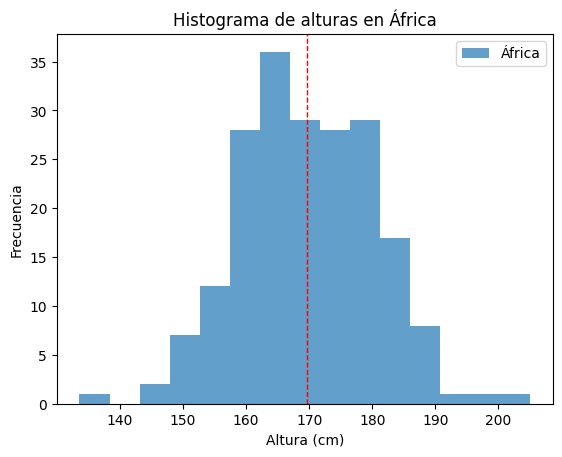

Continente: Oceanía
Altura media estimada: 170.89 cm
Intervalo de confianza del 95%: (169.45, 172.32) cm



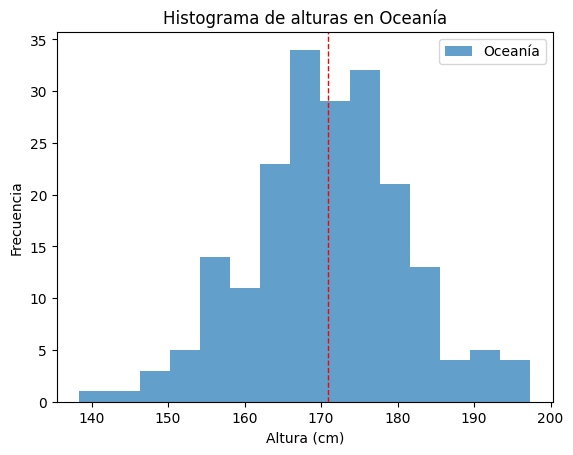

In [27]:
# Estimar la altura media de hombres de 18-30 años en el mundo 
# tomando muestras de 200 personas por continente

# Continentes y población simulada
continentes = ["América", "Europa", "Asia", "África", "Oceanía"]
poblacion = pd.DataFrame({"continente": np.random.choice(continentes, size=10000),
                           "edad": np.random.randint(18, 31, size=10000),
                           "altura": np.random.normal(loc=170, scale=10, size=10000)})

# Muestra de 200 personas por continente
for continente in continentes:
    muestra = poblacion[poblacion["continente"] == continente].sample(n=200, random_state=42)
    
    # Cálculo de la media y el intervalo de confianza del 95%
    media_muestra = muestra["altura"].mean()
    sem = stats.sem(muestra["altura"])
    intervalo_confianza = stats.t.interval(0.95, len(muestra)-1, loc=media_muestra, scale=sem)
    
    print(f"Continente: {continente}")
    print(f"Altura media estimada: {media_muestra:.2f} cm")
    print(f"Intervalo de confianza del 95%: ({intervalo_confianza[0]:.2f}, {intervalo_confianza[1]:.2f}) cm\n")
    # Visualización
    plt.hist(muestra["altura"], bins=15, alpha=0.7, label=f'{continente}')
    plt.axvline(media_muestra, color='red', linestyle='dashed', linewidth=1)
    plt.title(f'Histograma de alturas en {continente}')
    plt.xlabel('Altura (cm)')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()  
    

# Distribucion normal(guassiana)

La **distribución normal** o **gaussiana** es una distribución de probabilidad continua que tiene forma de campana. Es una de las distribuciones más importantes en estadística.

DISTRIBUCIÓN NORMAL POR CONTINENTE

América:
  Media: 169.80 cm
  Desv. Std: 9.80 cm
  N° personas: 1966

Europa:
  Media: 170.15 cm
  Desv. Std: 9.71 cm
  N° personas: 2063

Asia:
  Media: 169.96 cm
  Desv. Std: 10.12 cm
  N° personas: 1943

África:
  Media: 169.90 cm
  Desv. Std: 10.16 cm
  N° personas: 2084

Oceanía:
  Media: 170.37 cm
  Desv. Std: 9.90 cm
  N° personas: 1944


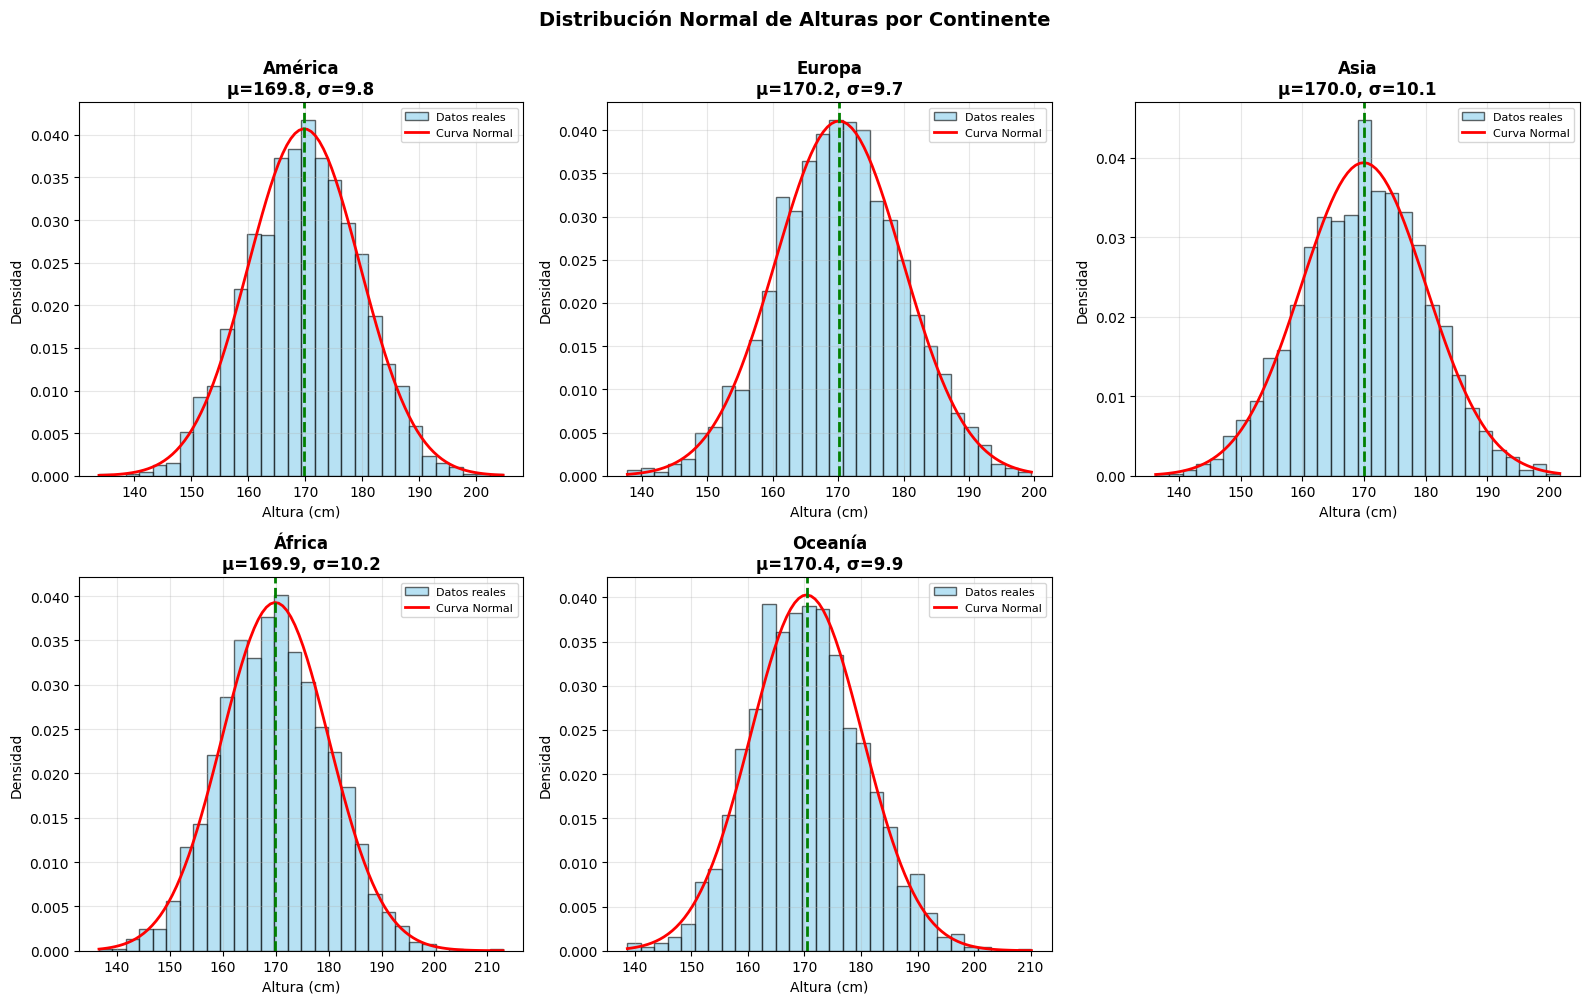

In [33]:
# Comparación de distribuciones normales por continente

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

print("="*60)
print("DISTRIBUCIÓN NORMAL POR CONTINENTE")
print("="*60)

for i, continente in enumerate(continentes):
    # Filtrar datos del continente
    datos_continente = poblacion[poblacion["continente"] == continente]["altura"]
    
    # Calcular parámetros
    media_cont = datos_continente.mean()
    std_cont = datos_continente.std()
    n_cont = len(datos_continente)
    
    print(f"\n{continente}:")
    print(f"  Media: {media_cont:.2f} cm")
    print(f"  Desv. Std: {std_cont:.2f} cm")
    print(f"  N° personas: {n_cont}")
    
    # Histograma
    axes[i].hist(datos_continente, bins=30, density=True, alpha=0.6, 
                 color='skyblue', edgecolor='black', label='Datos reales')
    
    # Curva normal
    x_cont = np.linspace(datos_continente.min(), datos_continente.max(), 100)
    curva = stats.norm.pdf(x_cont, media_cont, std_cont)
    axes[i].plot(x_cont, curva, 'r-', linewidth=2, label='Curva Normal')
    
    # Media
    axes[i].axvline(media_cont, color='green', linestyle='--', linewidth=2)
    
    axes[i].set_title(f'{continente}\nμ={media_cont:.1f}, σ={std_cont:.1f}', 
                     fontweight='bold')
    axes[i].set_xlabel('Altura (cm)')
    axes[i].set_ylabel('Densidad')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

# Ocultar el último subplot
axes[5].axis('off')

plt.suptitle('Distribución Normal de Alturas por Continente', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


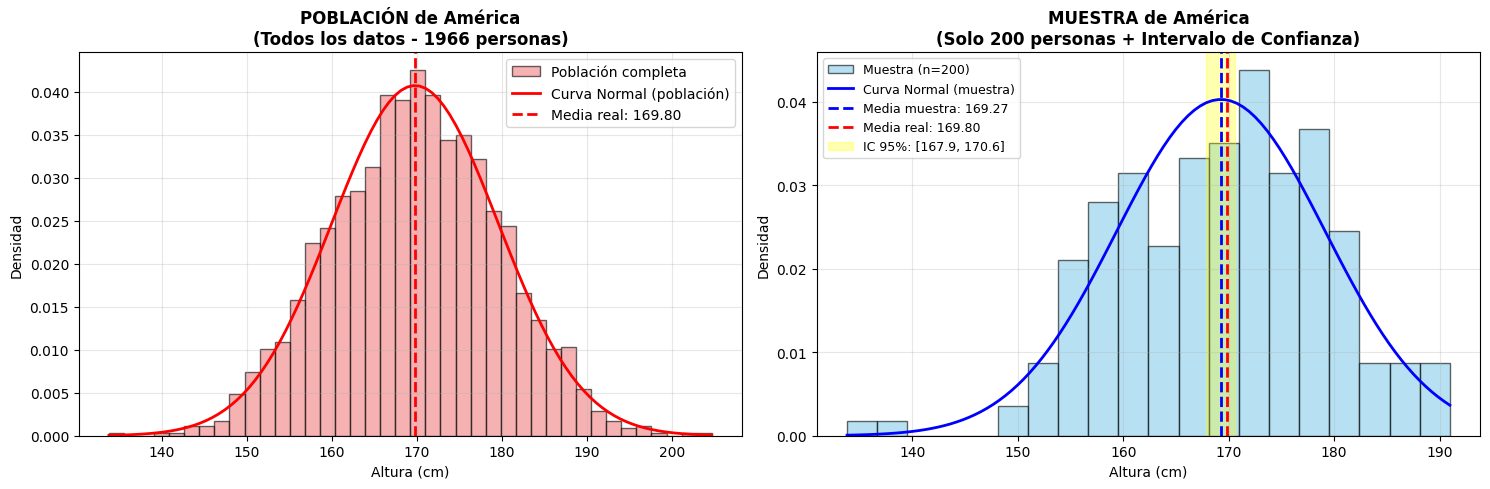

COMPARACIÓN: POBLACIÓN vs MUESTRA

                           POBLACIÓN         MUESTRA      DIFERENCIA
----------------------------------------------------------------------
Media                         169.80          169.27            0.54
Desv. Std                       9.80            9.91            0.11
Tamaño                          1966             200

VALIDACIÓN DEL INTERVALO DE CONFIANZA
Intervalo de confianza 95%: [167.88, 170.65] cm
Media poblacional real: 169.80 cm

✅ ¡ÉXITO! La media real SÍ está dentro del intervalo de confianza


In [34]:
# Demostración: Comparación población vs muestra (América)

continente_ejemplo = "América"
muestra_america = poblacion[poblacion["continente"] == continente_ejemplo].sample(n=200, random_state=42)
poblacion_america = poblacion[poblacion["continente"] == continente_ejemplo]

# Calcular parámetros
media_muestra = muestra_america["altura"].mean()
std_muestra = muestra_america["altura"].std()
media_poblacion_america = poblacion_america["altura"].mean()
std_poblacion_america = poblacion_america["altura"].std()

# Intervalo de confianza
sem = stats.sem(muestra_america["altura"])
ic = stats.t.interval(0.95, len(muestra_america)-1, loc=media_muestra, scale=sem)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Población completa de América
axes[0].hist(poblacion_america["altura"], bins=40, density=True, alpha=0.6,
             color='lightcoral', edgecolor='black', label='Población completa')
x_pob = np.linspace(poblacion_america["altura"].min(), poblacion_america["altura"].max(), 100)
axes[0].plot(x_pob, stats.norm.pdf(x_pob, media_poblacion_america, std_poblacion_america),
             'r-', linewidth=2, label='Curva Normal (población)')
axes[0].axvline(media_poblacion_america, color='red', linestyle='--', linewidth=2,
                label=f'Media real: {media_poblacion_america:.2f}')
axes[0].set_title(f'POBLACIÓN de {continente_ejemplo}\n(Todos los datos - {len(poblacion_america)} personas)',
                  fontweight='bold')
axes[0].set_xlabel('Altura (cm)')
axes[0].set_ylabel('Densidad')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Muestra e inferencia
axes[1].hist(muestra_america["altura"], bins=20, density=True, alpha=0.6,
             color='skyblue', edgecolor='black', label='Muestra (n=200)')
x_mues = np.linspace(muestra_america["altura"].min(), muestra_america["altura"].max(), 100)
axes[1].plot(x_mues, stats.norm.pdf(x_mues, media_muestra, std_muestra),
             'b-', linewidth=2, label='Curva Normal (muestra)')
axes[1].axvline(media_muestra, color='blue', linestyle='--', linewidth=2,
                label=f'Media muestra: {media_muestra:.2f}')
axes[1].axvline(media_poblacion_america, color='red', linestyle='--', linewidth=2,
                label=f'Media real: {media_poblacion_america:.2f}')
axes[1].axvspan(ic[0], ic[1], alpha=0.3, color='yellow',
                label=f'IC 95%: [{ic[0]:.1f}, {ic[1]:.1f}]')
axes[1].set_title(f'MUESTRA de {continente_ejemplo}\n(Solo 200 personas + Intervalo de Confianza)',
                  fontweight='bold')
axes[1].set_xlabel('Altura (cm)')
axes[1].set_ylabel('Densidad')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis numérico
print("="*70)
print("COMPARACIÓN: POBLACIÓN vs MUESTRA")
print("="*70)
print(f"\n{'':20} {'POBLACIÓN':>15} {'MUESTRA':>15} {'DIFERENCIA':>15}")
print("-"*70)
print(f"{'Media':20} {media_poblacion_america:>15.2f} {media_muestra:>15.2f} {abs(media_poblacion_america-media_muestra):>15.2f}")
print(f"{'Desv. Std':20} {std_poblacion_america:>15.2f} {std_muestra:>15.2f} {abs(std_poblacion_america-std_muestra):>15.2f}")
print(f"{'Tamaño':20} {len(poblacion_america):>15} {len(muestra_america):>15}")

print("\n" + "="*70)
print("VALIDACIÓN DEL INTERVALO DE CONFIANZA")
print("="*70)
print(f"Intervalo de confianza 95%: [{ic[0]:.2f}, {ic[1]:.2f}] cm")
print(f"Media poblacional real: {media_poblacion_america:.2f} cm")

if ic[0] <= media_poblacion_america <= ic[1]:
    print("\n✅ ¡ÉXITO! La media real SÍ está dentro del intervalo de confianza")
else:
    print("\n❌ La media real NO está en el intervalo (puede pasar en el 5% de casos)")


## Teorema del Límite Central (TLC)

El TLC establece que la distribución de las medias de múltiples muestras tiende a una distribución normal, sin importar la distribución original de la población.

TEOREMA DEL LÍMITE CENTRAL - Distribución de Medias Muestrales

Tamaño de muestra n=10:
  Media de las medias: 169.98 cm
  Desv. Std de las medias: 3.04 cm
  Error estándar teórico (σ/√n): 3.10 cm

Tamaño de muestra n=30:
  Media de las medias: 169.83 cm
  Desv. Std de las medias: 1.78 cm
  Error estándar teórico (σ/√n): 1.79 cm

Tamaño de muestra n=50:
  Media de las medias: 169.86 cm
  Desv. Std de las medias: 1.40 cm
  Error estándar teórico (σ/√n): 1.39 cm

Tamaño de muestra n=100:
  Media de las medias: 169.79 cm
  Desv. Std de las medias: 1.00 cm
  Error estándar teórico (σ/√n): 0.98 cm


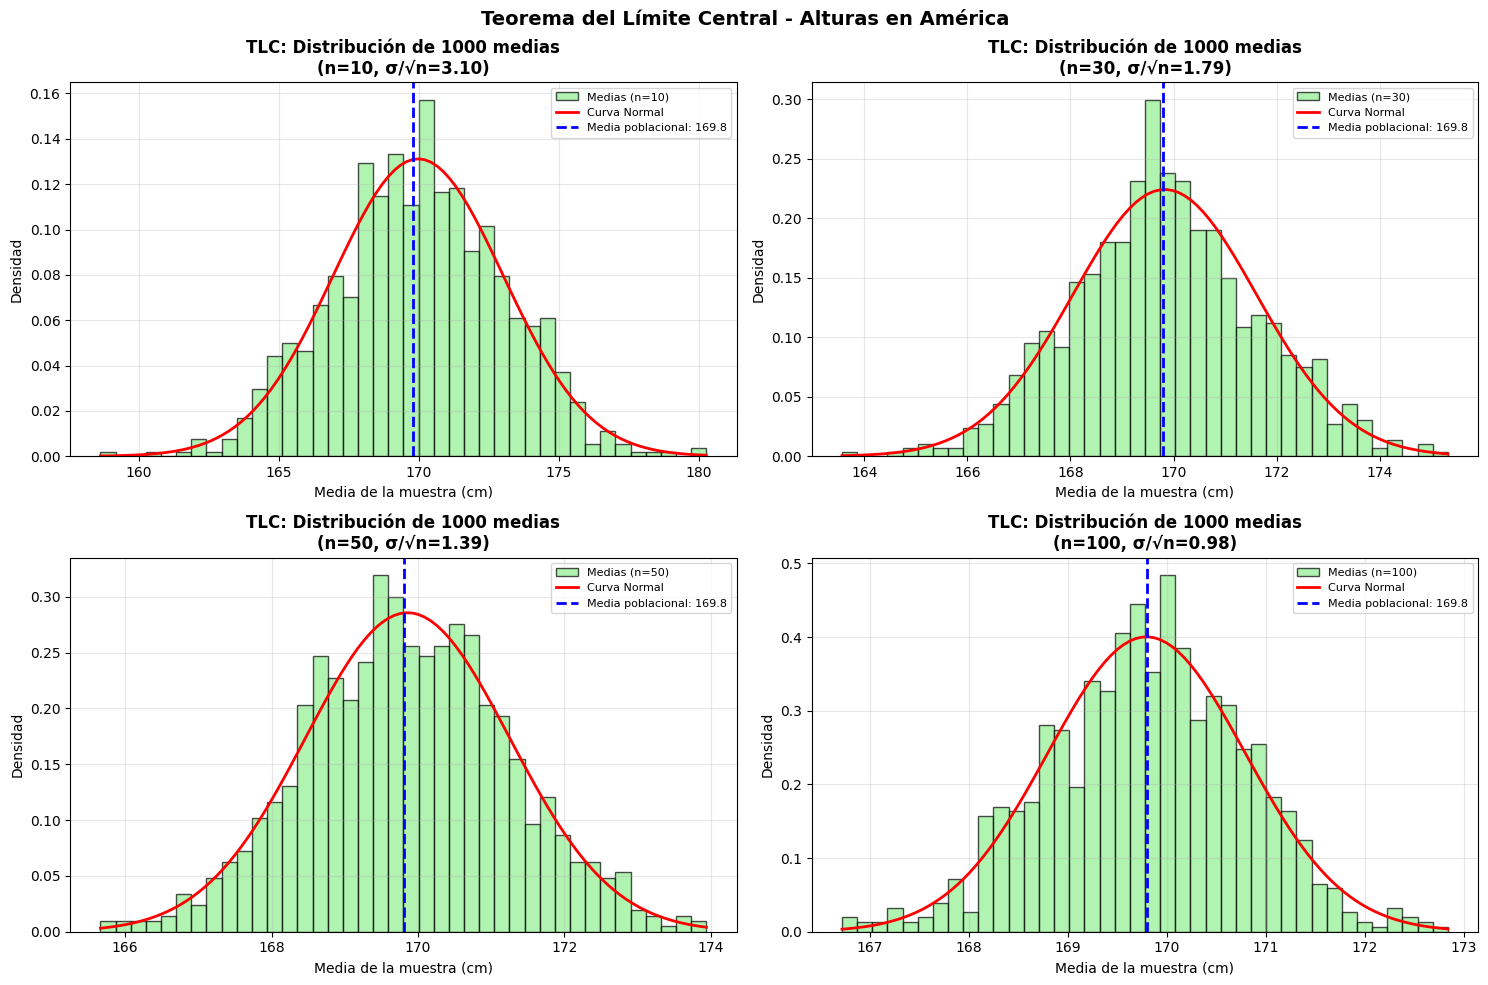


OBSERVACIONES:
✅ A mayor tamaño de muestra (n), la distribución es más estrecha
✅ Todas las distribuciones de medias tienen forma de campana (normal)
✅ La media de las medias ≈ media poblacional real
✅ La desviación estándar de las medias ≈ σ/√n (error estándar)


In [35]:
# Demostración del Teorema del Límite Central con alturas de América

# Tomar 1000 muestras de diferentes tamaños y calcular sus medias
tamaños_muestra = [10, 30, 50, 100]
num_muestras = 1000

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

print("="*70)
print("TEOREMA DEL LÍMITE CENTRAL - Distribución de Medias Muestrales")
print("="*70)

for idx, n in enumerate(tamaños_muestra):
    medias_muestrales = []
    
    # Tomar 1000 muestras y calcular la media de cada una
    for i in range(num_muestras):
        muestra = poblacion_america["altura"].sample(n=n, replace=True)
        medias_muestrales.append(muestra.mean())
    
    medias_muestrales = np.array(medias_muestrales)
    
    # Calcular parámetros de la distribución de medias
    media_de_medias = medias_muestrales.mean()
    std_de_medias = medias_muestrales.std()
    
    # Error estándar teórico: σ / √n
    error_estandar_teorico = std_poblacion_america / np.sqrt(n)
    
    print(f"\nTamaño de muestra n={n}:")
    print(f"  Media de las medias: {media_de_medias:.2f} cm")
    print(f"  Desv. Std de las medias: {std_de_medias:.2f} cm")
    print(f"  Error estándar teórico (σ/√n): {error_estandar_teorico:.2f} cm")
    
    # Visualización
    axes[idx].hist(medias_muestrales, bins=40, density=True, alpha=0.7,
                   color='lightgreen', edgecolor='black', label=f'Medias (n={n})')
    
    # Curva normal teórica para la distribución de medias
    x_medias = np.linspace(medias_muestrales.min(), medias_muestrales.max(), 100)
    curva_medias = stats.norm.pdf(x_medias, media_de_medias, std_de_medias)
    axes[idx].plot(x_medias, curva_medias, 'r-', linewidth=2, label='Curva Normal')
    
    # Marcar la media poblacional real
    axes[idx].axvline(media_poblacion_america, color='blue', linestyle='--', 
                      linewidth=2, label=f'Media poblacional: {media_poblacion_america:.1f}')
    
    axes[idx].set_title(f'TLC: Distribución de {num_muestras} medias\n(n={n}, σ/√n={error_estandar_teorico:.2f})',
                       fontweight='bold')
    axes[idx].set_xlabel('Media de la muestra (cm)')
    axes[idx].set_ylabel('Densidad')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle(f'Teorema del Límite Central - Alturas en {continente_ejemplo}', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("OBSERVACIONES:")
print("="*70)
print("✅ A mayor tamaño de muestra (n), la distribución es más estrecha")
print("✅ Todas las distribuciones de medias tienen forma de campana (normal)")
print("✅ La media de las medias ≈ media poblacional real")
print("✅ La desviación estándar de las medias ≈ σ/√n (error estándar)")

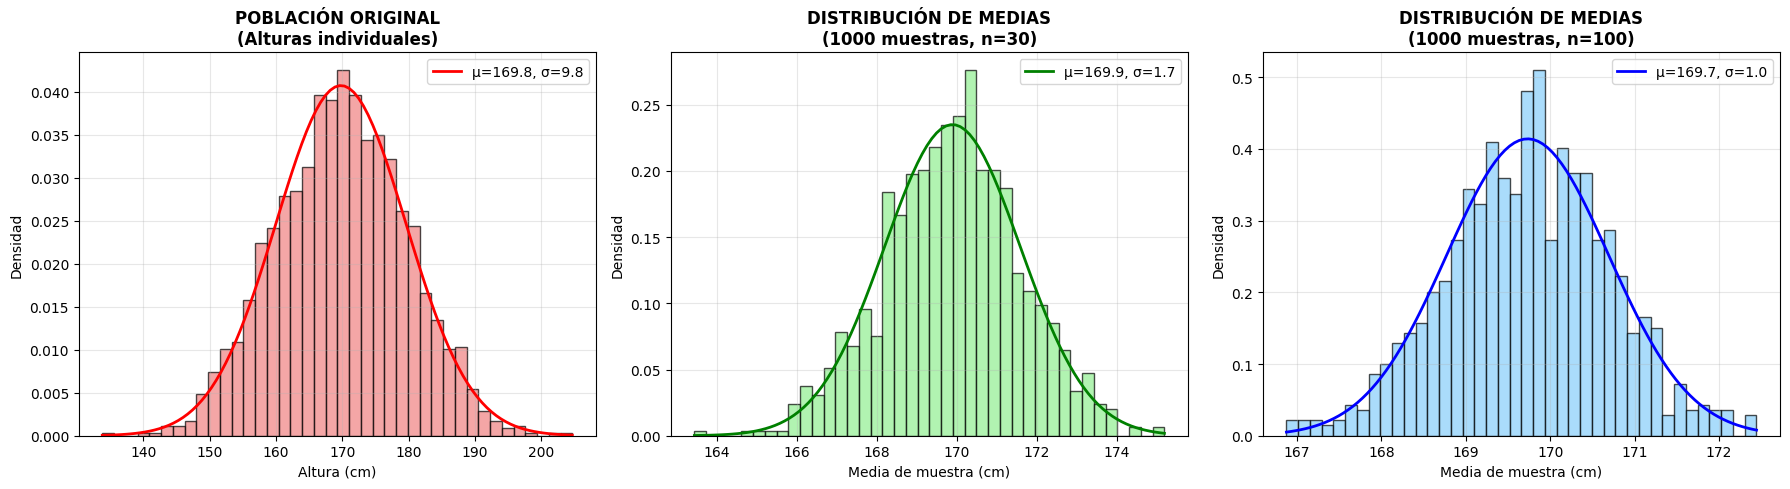

CONCLUSIÓN DEL TLC:
Población original: σ = 9.80 cm
Distribución de medias (n=30): σ = 1.70 cm
Distribución de medias (n=100): σ = 0.96 cm

✅ La distribución de medias es SIEMPRE más estrecha (menos dispersa)
✅ A mayor tamaño de muestra, más concentradas están las medias
✅ Todas mantienen la misma media central (~170 cm)


In [36]:
# Comparación visual: Población original vs Distribución de medias

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Distribución de la población original
axes[0].hist(poblacion_america["altura"], bins=40, density=True, alpha=0.7,
             color='lightcoral', edgecolor='black')
x_pob = np.linspace(poblacion_america["altura"].min(), poblacion_america["altura"].max(), 100)
axes[0].plot(x_pob, stats.norm.pdf(x_pob, media_poblacion_america, std_poblacion_america),
             'r-', linewidth=2, label=f'μ={media_poblacion_america:.1f}, σ={std_poblacion_america:.1f}')
axes[0].set_title('POBLACIÓN ORIGINAL\n(Alturas individuales)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Altura (cm)')
axes[0].set_ylabel('Densidad')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Distribución de medias (n=30)
medias_n30 = [poblacion_america["altura"].sample(n=30, replace=True).mean() for _ in range(1000)]
media_medias = np.mean(medias_n30)
std_medias = np.std(medias_n30)
axes[1].hist(medias_n30, bins=40, density=True, alpha=0.7,
             color='lightgreen', edgecolor='black')
x_medias = np.linspace(min(medias_n30), max(medias_n30), 100)
axes[1].plot(x_medias, stats.norm.pdf(x_medias, media_medias, std_medias),
             'g-', linewidth=2, label=f'μ={media_medias:.1f}, σ={std_medias:.1f}')
axes[1].set_title('DISTRIBUCIÓN DE MEDIAS\n(1000 muestras, n=30)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Media de muestra (cm)')
axes[1].set_ylabel('Densidad')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Distribución de medias (n=100)
medias_n100 = [poblacion_america["altura"].sample(n=100, replace=True).mean() for _ in range(1000)]
media_medias2 = np.mean(medias_n100)
std_medias2 = np.std(medias_n100)
axes[2].hist(medias_n100, bins=40, density=True, alpha=0.7,
             color='lightskyblue', edgecolor='black')
x_medias2 = np.linspace(min(medias_n100), max(medias_n100), 100)
axes[2].plot(x_medias2, stats.norm.pdf(x_medias2, media_medias2, std_medias2),
             'b-', linewidth=2, label=f'μ={media_medias2:.1f}, σ={std_medias2:.1f}')
axes[2].set_title('DISTRIBUCIÓN DE MEDIAS\n(1000 muestras, n=100)', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Media de muestra (cm)')
axes[2].set_ylabel('Densidad')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*70)
print("CONCLUSIÓN DEL TLC:")
print("="*70)
print(f"Población original: σ = {std_poblacion_america:.2f} cm")
print(f"Distribución de medias (n=30): σ = {std_medias:.2f} cm")
print(f"Distribución de medias (n=100): σ = {std_medias2:.2f} cm")
print("\n✅ La distribución de medias es SIEMPRE más estrecha (menos dispersa)")
print("✅ A mayor tamaño de muestra, más concentradas están las medias")
print("✅ Todas mantienen la misma media central (~170 cm)")